# Binary Classification of Machine Failures

About XGBoost (Extreme Gradient Boosting):

XGBoost is a high-performance gradient boosting library optimized for both fast execution speed and model performance.
This algorithm is an ensemble method that works on decision trees and obtains results by combining the predictions of multiple trees.
It also implements a gradient boosting method that continuously improves model performance by iteratively working on errors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [2]:
#Importing datasets
train = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')


In [3]:
print(train.isnull().sum())

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [4]:
# Concentration datasets
combined = pd.concat([train, test], sort=False)

# One-hot encoding procedure on concentrated dataset
combined = pd.get_dummies(combined)

# Seperating datasets
train = combined[combined['Machine failure'].notna()]
test = combined[combined['Machine failure'].isna()].drop('Machine failure', axis=1)

# Removing "<", ">", "]" , "[" characters
train.columns = train.columns.str.replace('[<,>,\,,\[, \]]', '', regex=True)
test.columns = test.columns.str.replace('[<,>,\,,\[, \]]', '', regex=True)


In [5]:
print(train.columns)


Index(['id', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm',
       'TorqueNm', 'Toolwearmin', 'Machinefailure', 'TWF', 'HDF', 'PWF',
       ...
       'ProductID_M24846', 'ProductID_M24847', 'ProductID_M24849',
       'ProductID_M24851', 'ProductID_M24855', 'ProductID_M24857',
       'ProductID_M24859', 'Type_H', 'Type_L', 'Type_M'],
      dtype='object', length=10010)


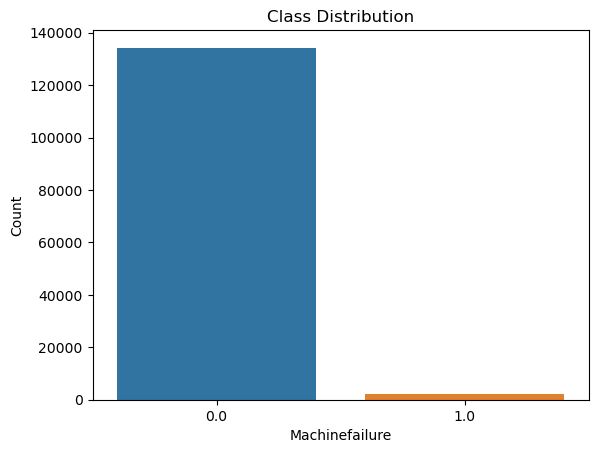

In [6]:
# Class distribution plot
sns.countplot(x='Machinefailure', data=train)
plt.xlabel('Machinefailure')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [7]:
# Separate target variable and properties
X = train.drop(['id', 'Machinefailure'], axis=1)
y = train['Machinefailure']

# Seperating dataset into test and train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model creation and training
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [8]:
# Predict on validation set and calculate ROC AUC score
y_val_pred = model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_pred)
print(f'Validation ROC AUC Score: {roc_auc}')

Validation ROC AUC Score: 0.959998976140328


In [9]:
# Prediction on test set
test['Machinefailure'] = model.predict_proba(test.drop('id', axis=1))[:, 1]

# Save results
submission = test[['id', 'Machinefailure']]
submission.rename(columns={"Machinefailure":"Machine failure"},inplace=True)
submission.to_csv('submission.csv', index=False)

/tmp/ipykernel_20/2658126869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.rename(columns={"Machinefailure":"Machine failure"},inplace=True)
